# **Graph representation learning and reinforcement learning for drug discovery**

### MIE1517 project progress report

Group Number: 14

Group Members: 
* Faraz Khoshbakhtian
* Mina Mahdian, 1004550915
* Marsroor Bayati, 1006010594
* Wenhao Li, 1008095491

Colab_link: https://drive.google.com/file/d/1jbDJcK0p_41xmyQwPBHzVgL7B9t3lJFU/view?usp=sharing

# **Introduction**

Biological networks have a key role in drug discovery for disease treatement. The study of biological networks and identifying critical nodes can facilitate identification of the key targets in treating diseases. However, efficiently finding critical nodes with low cost is challenging. Additionally different experimental works exist to identify critical nodes which are expensive and time consuming. The development of analytics including statistics and machine learning has revolutionized critical node detections [1]. The Critical Node Detection Problem (CNDP) is the optimizaiton problem that consists in finding a set of nodes, the deletion of which maximally degrades network connectivity according to some predefined connectivity metrices[2]. This project is to find a minimum cardinality set of proteins whose removal would optimally dismantle the interactions in the protein- protein network and help neutralize harmful organisms such as bacteria or viruses. Finding key players or nodes in protein-protein interaction networks can have great implications for structure based strategies of drug design. We use **Finder** [2] a novel frame work that combines techniques from Graph Neural Net (GNN) and Reinforcement Learning (RL) to achieve fast and effective CNDP. The original finder is writen with tensor flow (TF). We wrote Finder with pytorch to implement for our work. All of our work can be  found in this github: 

https://github.com/faraz2023/FINDER-pytorch.git

To find key node players,  we use four node centrality methods:

**High degree adaptive (HDA)**: 

Ranks node soley by degree and sequentially removes the nodes with the highest degree. HDA recomputes the degrees of the remaining nodes after each node removal.

**High Page Rank Adaptive (HPRA)** : 

HPRA greedly remove the nodes with the highest page rank centrality and then recompute the page rank for the remaining nodes. Page rank have been widely employed in search engins as it provides a global ranking of all web pages, regardless of their content, based soley on their location in the web's graph structure.

**High Betweenness Adaptive (HBA)**: 

HBA sequentially remove the nodes with the highest betweeness centrality (BC) and recompute BC for the remaining nodes.

**High Closeness Adaptive (HCA)**: 

HCA sequentially remove the node with the highest closeness centrality (CC)and updates CC for the remaining nodes.CC describes how close a node is to all the other nodes in the graph.



**Reference**

[1] X.Liu et al., "Coputational methods for identifying the critical nodes in biological networks", vol.21, no.2, pp. 486-497, 2020.

[2] C. Fan, L. Zeng, Y. Sun, and Y.Y. Liu, Finder supplementary, vol. 2, no.6. 2020.

## Model implementation

FINDER [2] is a state-of-the-art RL framework for combinatorial optimization on graphs. It combines GraphSAGE, a modern GNN, with DQN, a well-known deep RL algorithm. Similar to most other graph representation learning algorithms, FINDER consists of an encoder-decoder pair. 

The encoder in FINDER learns to represent each node in the graph as a vector in the latent space (i.e., learns node embeddings) and the decoder learns to score nodes accordinig to their importance to the graph's connectivity. 

The encoder follows the GraphSAGE architecture where information is aggregated from k-hop neighbourhoods to produce node embeddings (e.g., 64-dimensional vectors). 

The decoder consistst of a 2-layer MLP that treats the node embeddings from the encoder as the current "state" (to frame the problem in a Markove Decision Process) of the graph and estimates the value of removing a node and the damage to connectivity of the residual graph. 

Finally, a greedy algorithm is leveraged to select the highest scoring nodes at each iteration and to remove them from the graph. 

General CNDP is an NP-hard problem. There are many heurstics that offer approximations to the solution but all of those are domain specific and require significant re-configuring when the setup of the problem is changed. For example, there are many approaches to the network dismantling (ND) problem (i.e., reducing the giant connected component size) but most of these perform well under the assumption that no removal cost is associated with the nodes. 

What RL+GNN offers is a generalization to the CNDP. As we will see FINDER performs simillar to most well-known ND algorithms under the no cost assumption but it outperforms everyone one of them when there is a varying removal cost associated with the nodes. FINDER can be easily trained with different reward signals to achive different tasks. Here we try FINDER once there is no cost associated with removing nodes and once where nodes have a cost of removal proportional to their degree. 

For this project, we wanted to re-write FINDER in pyTorch and study its performance on a protein-to-protein interaction dataset (i.e., HI-II-14). This task posed a series of challanges to us:
1. FINDER was originally written in TensorFlow version 1. TF1 uses static computation graphs while PyTorch leverages eager computation. 
2. FINDER's computation graph behaves differently between training and testing. While training, the model computes the value function approximation of indvidiual nodes, while in testing the value approixmation of all nodes is computed in single forward passes. We needed to implement two different forward passes. 
3. Graphs can be extremely big. In network studies, graphs of >500K nodes are the norm. Therefore many graph representation learning implementations use sparse matrices for algebraic calculations. PyTorch is exteremly slow with sparse matrics. We thus had to implement the pipeline using `torch-tensor`, a torch library dedicated to sparse matrice operations.  

## Training


Graph representation syntethic can blur the boundries between supervised and unsupervised learning. FINDER can be trained purely on synthetic. In fact, we exclusively rely on training FINDER on Barabasi-Albert graphs of 30 to 50 nodes and then test it on a real-world network. 

Like any other DQN, FINDER lebverages concepts such as memory buffer and target networks. For the current implementation we used n-step DQN. At each iteration, a BATCH_SIZE (e.g., 64) set of nodes are randomly drawn from the memory buffer alongside the information about their 2-hop neighbourhood. Actual reward values for these actions (i.e., node removals) is available from the memory buffer.Thw Q-network too tries to approixmate these rewards. The loss is calculated on these approximations; then backward propagation and hence optimization!

## Data prepation (real world data)

### Data source#1 

Title: The Human Reference Protein Interactome Mapping Project

link: http://www.interactome-atlas.org/download

In [ ]:
# mount GD
from google.colab import drive
drive.mount('/content/drive')

# your GD path to clone the repo and setup data
project_path="/content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Clone repo
%cd {project_path}

# clone github to google colab 
!git clone https://github.com/faraz2023/FINDER-pytorch.git

/content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report
Cloning into 'FINDER-pytorch'...
remote: Enumerating objects: 1506, done.
remote: Counting objects: 100% (937/937), done.
remote: Compressing objects: 100% (646/646), done.
remote: Total 1506 (delta 538), reused 630 (delta 247), pack-reused 569
Receiving objects: 100% (1506/1506), 10.31 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (869/869), done.
Checking out files: 100% (573/573), done.
/content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report/FINDER-pytorch


In [ ]:
%cd {project_path}/FINDER-pytorch

/content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report/FINDER-pytorch


In [ ]:
# Load raw data from .tsv format
import pandas as pd
import networkx as nx

# The data and web portal are made available to the public under the CC BY 4.0 license. 
# Users of the web portal or its data should cite the web portal and the HuRI publication.
# Data source: http://www.interactome-atlas.org/
# HuRI publication: https://pubmed.ncbi.nlm.nih.gov/25416956/

# We will used some smaller networks including Venkatesan-09, H-I-05, HI-II-14 as our validation dataset
data_url = "http://www.interactome-atlas.org/data/HI-II-14.tsv"
raw_edge_list = pd.read_csv(data_url, sep='\t', names=['node_from','node_to'])

# As we can see there are several self referencing edges, we would need to clean up those first
uni_edge_list = raw_edge_list[raw_edge_list.node_from != raw_edge_list.node_to]

# Now we need to mask all protein labels [GENCODE (v27)] such as ENSG00000204889 to index numbers
edge_list = uni_edge_list.stack().rank(method='dense').unstack().astype(int)

# Then we need to un-scale all index by 1, so it starts at 0
edge_list['node_from']-=1
edge_list['node_to']-=1

print(edge_list)

# Now we use networkx lib to convert it into a graph
G = nx.from_pandas_edgelist(edge_list, source='node_from', target='node_to')

# We add weights to nodes (note it's not weights on edges)
nx.set_node_attributes(G, 0.0, "weight")

nx.write_gml(G, f"{project_path}/FINDER-pytorch/data/raw_HI-II-14.gml")

print(G.nodes[0]['weight'])

       node_from  node_to
0              0     2546
1              1     2173
2              2      516
3              2     1812
4              2     2499
...          ...      ...
13623       4054     4104
13626       4057     4063
13627       4057     4074
13628       4057     4095
13629       4057     4109

[13115 rows x 2 columns]
0.0


## Run model & results

The results was obtained offline on a high memory GPU workstation. Here we will show some benchmarks and evaluations.

### model preparation

In [ ]:
# To where you want to build modules
# New torch ND model
%cd {project_path}/FINDER-pytorch/code/FINDER_ND/

# New torch ND_cost model
#%cd {project_path}/FINDER-pytorch/code/FINDER_ND_cost/

/content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report/FINDER-pytorch/code/FINDER_ND


In [ ]:
# install environments, NEED TO restart kernel after installation
# torch_sparse and torch_scatter are slow on installation (normal, don't abort)
# could takes ~ 16 min
!pip install cython==0.29.13
!pip install networkx==2.3
!pip install numpy==1.17.3
!pip install pandas==0.25.2
!pip install scipy==1.3.1
!pip install tqdm==4.36.1
!pip install torchvision
!pip install torch_sparse
!pip install torch_scatter
!pip install tensorflow-gpu==1.14.0 

In [ ]:
# build modules
!python setup.py build_ext -i

running build_ext
skipping 'PrepareBatchGraph.cpp' Cython extension (up-to-date)
skipping 'graph.cpp' Cython extension (up-to-date)
skipping 'mvc_env.cpp' Cython extension (up-to-date)
skipping 'utils.cpp' Cython extension (up-to-date)
skipping 'nstep_replay_mem.cpp' Cython extension (up-to-date)
skipping 'nstep_replay_mem_prioritized.cpp' Cython extension (up-to-date)
skipping 'graph_struct.cpp' Cython extension (up-to-date)
skipping 'FINDER.c' Cython extension (up-to-date)
skipping 'FINDER_torch.c' Cython extension (up-to-date)
skipping 'FINDER_net.c' Cython extension (up-to-date)


In [ ]:
# If you encounter - cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model'
# try resinstall tf and restart kernel
!pip uninstall -y tensorflow-gpu==1.14.0 
!pip install tensorflow-gpu==1.14.0 

In [ ]:
import time
import sys,os

import networkx as nx
import numpy as np
import random
import os
import os
from shutil import copyfile
from tqdm import tqdm


# use old module functions
sys.path.append(f'{project_path}/FINDER-pytorch/code/FINDER_ND/')
from FINDER import FINDER

finder = FINDER()

# Benchmark methods
# HXA with maxcc
# HDA: High Degree Adaptive
# HBA: High Betweenness Adaptive
# HCA: High Closeness Adaptive
# HPRA: High PageRank Adaptive
def HXA(g, method):
        # 'HDA', 'HBA', 'HPRA', 'HCA'
        sol = []
        G = g.copy()
        while (nx.number_of_edges(G)>0):
            if method == 'HDA':
                dc = nx.degree_centrality(G)
            elif method == 'HBA':
                dc = nx.betweenness_centrality(G)
            elif method == 'HCA':
                dc = nx.closeness_centrality(G)
            elif method == 'HPRA':
                dc = nx.pagerank(G)
            keys = list(dc.keys())
            values = list(dc.values())
            maxTag = np.argmax(values)
            node = keys[maxTag]
            sol.append(node)
            G.remove_node(node)
        solution = sol + list(set(g.nodes())^set(sol))
        solutions = [int(i) for i in solution]
        Robustness = finder.utils.getRobustness(finder.GenNetwork(g), solutions)
        MaxCCList = finder.utils.MaxWccSzList
        return Robustness,MaxCCList,solutions

# modified from original EvaluateSol
def EvaluateSol(g, sol_file, strategyID=0, reInsertStep=20):
        #evaluate the robust given the solution, strategyID:0,count;2:rank;3:multipy
        #sys.stdout.flush()
        # g = nx.read_weighted_edgelist(data_test)
        #g = nx.read_gml(data_test)
        g_inner = finder.GenNetwork(g)
        print('Evaluating FINDER model')
        print('number of nodes:%d'%nx.number_of_nodes(g))
        print('number of edges:%d'%nx.number_of_edges(g))
        nodes = list(range(nx.number_of_nodes(g)))
        sol = []
        for line in open(sol_file):
            sol.append(int(line))

        sol_left = list(set(nodes)^set(sol))
        if strategyID > 0:
            start = time.time()
            sol_reinsert = finder.utils.reInsert(g_inner, sol, sol_left, strategyID, reInsertStep)
            end = time.time()
            print ('reInsert time:%.6f'%(end-start))
        else:
            sol_reinsert = sol
        solution = sol_reinsert + sol_left
        print('number of solution nodes:%d'%len(solution))
        Robustness = finder.utils.getRobustness(g_inner, solution)
        MaxCCList = finder.utils.MaxWccSzList
        return Robustness, MaxCCList, solution


# load graph from ready to use gml (converted from datasets)
# Network names are: "Digg", "HI-II-14"
# Weight types are: 001, degree, random, zero
def build_graph_path(network_name,weight_type="001"):
    return f"{project_path}/FINDER-pytorch/data/real/cost/{network_name}_{weight_type}.gml"

# load solution files generated by model
# Network names are: "Digg", "HI-II-14"
# Model names are: FINDER_ND_cost, old_FINDER_ND_cost_tf etc.
# step_ratio are: 0.0100, etc.
# Weight types are: 001, degree, random, zero
def build_solution_path(network_name,model_name="FINDER_CN_cost",step_ratio="0.0100",weight_type="001"):
    data_folder=""
    if(weight_type!=""):
        weight_type=f"_{weight_type}"
        data_folder=f"Data{weight_type}/"
    return f"{project_path}/FINDER-pytorch/code/results/{model_name}/real/{data_folder}StepRatio_{step_ratio}/{network_name}{weight_type}.txt"

# Get sum of node weights
def get_node_weights(g):
    sum=0.0
    for i,v in g.nodes(data=True):
        sum+=v["weight"]
    return sum

# compute the ratio of cost of removed nodes / totol cost
# TODO, add step (or not, since it's test dataset, step is just trick at training stage)
def get_frac_cost_of_removed_nodes(g,solutions,ND_cost=False,verbose=0):
    num_nodes = nx.number_of_nodes(g) 
    if(ND_cost):
      total_weight = get_node_weights(g)
    else:
      total_weight = g.size()

    g_mod = g.copy()
    if(verbose>0):
        print("\nOriginal # of nodes: ",num_nodes)
        print("Original total weight: ",total_weight)
        print("Solution: ", len(solutions), " = ", solutions , "\n")

    frac_cost_list=[]
    for rm_node in tqdm(solutions):
    #for rm_node in reversed(solutions):
        g_mod.remove_node(rm_node)
        if(ND_cost):
          left_weight = get_node_weights(g_mod)
        else:
          left_weight = g_mod.size()

        frac_cost = (total_weight - left_weight) / total_weight
        frac_cost_list.append(frac_cost)
        if(verbose>1):
            print("Removed node: ", rm_node)
            print("left_weight: ", left_weight)
            print("Frac cost of removed nodes: ", frac_cost)
                
    return frac_cost_list



### Network dismentaling

In [ ]:
# ND, without cost

# load network
network_file_path = build_graph_path("HI-II-14","zero")
print("Graph Network:", network_file_path)
g = nx.read_gml(network_file_path, destringizer=int)


# get HXA solutions
HDA_robustness, HDA_maxcclist,HDA_solutions  = HXA(g, "HDA")
print("From HDA:",HDA_robustness, HDA_maxcclist[0:5],HDA_solutions[0:5])

#HBA_robustness, HBA_maxcclist,HBA_solutions  = HXA(g, "HBA")
#print("From HBA:",HBA_robustness, HBA_maxcclist[0:5],HBA_solutions[0:5])

#HCA_robustness, HCA_maxcclist,HCA_solutions  = HXA(g, "HCA")
#print("From HCA:",HCA_robustness, HCA_maxcclist[0:5],HCA_solutions[0:5])

HPRA_robustness, HPRA_maxcclist,HPRA_solutions  = HXA(g, "HPRA")
print("From HPRA:",HPRA_robustness, HPRA_maxcclist[0:5],HPRA_solutions[0:5])

# get our torch FINDER solution
FINDER_torch_solution_file_path = build_solution_path("HI-II-14",model_name="FINDER_ND",weight_type="")
print("\nSolution file:", FINDER_torch_solution_file_path)
FINDER_robustness, FINDER_maxcclist,FINDER_solutions  = EvaluateSol(g, FINDER_torch_solution_file_path)
print("From FINDER:",FINDER_robustness, FINDER_maxcclist[0:5],FINDER_solutions[0:5])

# get old FINDER solution
OFINDER_torch_solution_file_path = build_solution_path("HI-II-14",model_name="old_FINDER_ND_tf",weight_type="")
print("\nSolution file:", OFINDER_torch_solution_file_path)
OFINDER_robustness, OFINDER_maxcclist,OFINDER_solutions  = EvaluateSol(g, OFINDER_torch_solution_file_path)
print("From Old FINDER:",OFINDER_robustness, OFINDER_maxcclist[0:5],OFINDER_solutions[0:5])


Graph Network: /content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report//FINDER-pytorch/data/real/cost/HI-II-14_zero.gml
From HDA: 0.05723756969774704 [1.0, 0.9961584633853542, 0.9913565426170469, 0.9858343337334934, 0.9810324129651861] [53, 124, 66, 33, 236]
From HPRA: 0.05876478802805636 [1.0, 0.9961584633853542, 0.9913565426170469, 0.9810324129651861, 0.9755102040816327] [53, 124, 236, 66, 425]

Solution file: /content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report//FINDER-pytorch/code/results/FINDER_ND/real/StepRatio_0.0100/HI-II-14.txt
Evaluating FINDER model
number of nodes:4165
number of edges:13087
number of solution nodes:4165
From FINDER: 0.3035508561167564 [1.0, 0.9995198079231693, 0.9990396158463385, 0.9983193277310924, 0.9980792316926771] [246, 55, 104, 376, 2094]

Solution file: /content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report//FINDER-pytorch/code/results/old_FINDER_ND_tf/real/StepRatio_0.0100/HI-II-14.txt
Evaluating FINDER model
number of

In [ ]:
# get ratio of cost of removed nodes / totol cost per remove nodes

HDA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HDA_solutions)
#HBA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HBA_solutions)
#HCA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HCA_solutions)
HPRA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HPRA_solutions)

FINDER_frac_cost_list = get_frac_cost_of_removed_nodes(g,FINDER_solutions,verbose=1)
OFINDER_frac_cost_list = get_frac_cost_of_removed_nodes(g,OFINDER_solutions,verbose=1)


  1%|          | 37/4165 [00:00<00:11, 364.41it/s]


Original # of nodes:  4165
Original total weight:  13087
Solution:  4165  =  [246, 55, 104, 376, 2094, 103, 2753, 936, 84, 16, 80, 271, 367, 241, 780, 916, 398, 823, 73, 380, 831, 1677, 391, 180, 721, 574, 368, 782, 839, 1478, 124, 1700, 221, 1465, 96, 304, 837, 1003, 880, 166, 824, 1846, 126, 969, 866, 24, 29, 50, 41, 87, 114, 362, 370, 258, 288, 1880, 4, 40, 2446, 1149, 88, 264, 2109, 1354, 977, 975, 976, 974, 973, 3, 8, 686, 1001, 821, 822, 77, 833, 2144, 332, 920, 112, 952, 808, 30, 3043, 3040, 2634, 2775, 871, 169, 378, 884, 296, 895, 406, 2143, 25, 371, 122, 268, 2642, 2773, 881, 1692, 1361, 575, 372, 861, 870, 928, 995, 981, 171, 2023, 403, 90, 13, 1009, 1041, 2421, 1158, 830, 567, 283, 1007, 383, 2814, 2815, 2819, 2072, 2440, 2945, 1774, 1225, 694, 799, 2046, 99, 1030, 1344, 765, 31, 930, 2026, 68, 1688, 231, 2751, 101, 2943, 17, 945, 2029, 2889, 364, 803, 531, 1356, 670, 3119, 314, 1033, 1491, 1498, 393, 967, 1490, 2064, 78, 1936, 832, 293, 1707, 579, 2763, 89, 300, 1720, 211

  1%|          | 49/4165 [00:00<00:08, 480.20it/s]


Original # of nodes:  4165
Original total weight:  13087
Solution:  4165  =  [2406, 2645, 1429, 1437, 366, 961, 2513, 91, 98, 628, 1744, 698, 801, 872, 606, 604, 661, 358, 878, 519, 819, 873, 933, 357, 44, 704, 960, 929, 76, 75, 119, 28, 85, 11, 359, 287, 663, 1199, 820, 302, 826, 800, 363, 2151, 581, 89, 127, 855, 369, 108, 840, 544, 68, 342, 915, 799, 25, 161, 112, 852, 531, 821, 393, 34, 2148, 925, 286, 168, 871, 154, 699, 590, 99, 885, 370, 17, 78, 167, 37, 87, 267, 374, 822, 842, 280, 13, 1047, 283, 296, 88, 564, 114, 242, 51, 2111, 380, 803, 827, 77, 364, 4, 427, 825, 899, 765, 253, 7, 236, 309, 292, 39, 371, 90, 832, 831, 121, 579, 22, 830, 126, 170, 884, 295, 96, 362, 365, 700, 43, 823, 1222, 20, 932, 80, 274, 304, 643, 122, 258, 582, 914, 103, 1006, 470, 575, 9, 927, 288, 257, 686, 835, 55, 901, 0, 2230, 53, 95, 101, 1010, 172, 1791, 290, 795, 808, 82, 847, 282, 882, 84, 2224, 1028, 361, 839, 684, 1747, 293, 2124, 31, 978, 376, 609, 2, 169, 829, 1382, 906, 1562, 689, 2231, 28

100%|██████████| 4165/4165 [00:03<00:00, 1096.18it/s]


Text(0, 0.5, 'Residual gcc size')

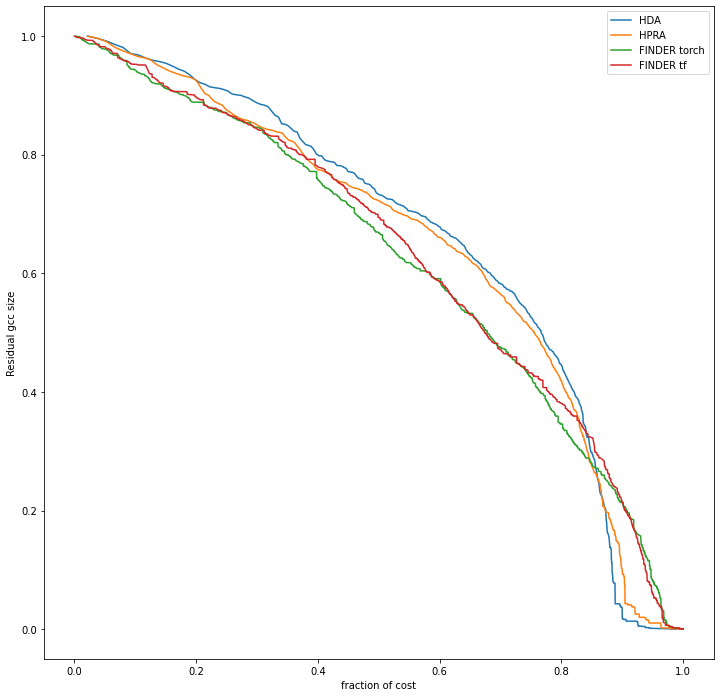

In [ ]:
# plot
# x = fraction (cost) of the removed nodes
# y = size of the giant connected component(GCC) in the residual graph

from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))
plt.plot(HDA_frac_cost_list, HDA_maxcclist, label="HDA")
#plt.plot(HBA_frac_cost_list, HBA_maxcclist, label="HBA")
#plt.plot(HCA_frac_cost_list, HCA_maxcclist, label="HCA")
plt.plot(HPRA_frac_cost_list, HPRA_maxcclist, label="HPRA")

plt.plot(FINDER_frac_cost_list, FINDER_maxcclist, label="FINDER torch")
plt.plot(OFINDER_frac_cost_list, OFINDER_maxcclist, label="FINDER tf")


plt.legend()
plt.xlabel("fraction of cost")
plt.ylabel("Residual gcc size")

### Network dismentaling with cost

Here we try assign a removal cost C(n) to each node, where C(n) is propotional to n.degree and sum{ C(n) }=1

In [ ]:
# ND, cost

# load network
network_file_path = build_graph_path("HI-II-14","degree")
g = nx.read_gml(network_file_path, destringizer=int)


# get HDA solution
HDA_robustness, HDA_maxcclist,HDA_solutions  = HXA(g, "HDA")
print("From HDA:",HDA_robustness, HDA_maxcclist[0:5],HDA_solutions[0:5])

#HBA_robustness, HBA_maxcclist,HBA_solutions  = HXA(g, "HBA")
#print("From HBA:",HBA_robustness, HBA_maxcclist[0:5],HBA_solutions[0:5])

#HCA_robustness, HCA_maxcclist,HCA_solutions  = HXA(g, "HCA")
#print("From HCA:",HCA_robustness, HCA_maxcclist[0:5],HCA_solutions[0:5])

HPRA_robustness, HPRA_maxcclist,HPRA_solutions  = HXA(g, "HPRA")
print("From HPRA:",HPRA_robustness, HPRA_maxcclist[0:5],HPRA_solutions[0:5])


# get our torch FINDER solution
FINDER_torch_solution_file_path = build_solution_path("HI-II-14",model_name="FINDER_ND_cost",weight_type="degree")
print("\nSolution file:", FINDER_torch_solution_file_path)
FINDER_robustness, FINDER_maxcclist,FINDER_solutions  = EvaluateSol(g, FINDER_torch_solution_file_path)
print("From FINDER:",FINDER_robustness, FINDER_maxcclist[0:5],FINDER_solutions[0:5])

# get old FINDER solution
OFINDER_torch_solution_file_path = build_solution_path("HI-II-14",model_name="old_FINDER_ND_cost_tf",weight_type="degree")
print("\nSolution file:", OFINDER_torch_solution_file_path)
OFINDER_robustness, OFINDER_maxcclist,OFINDER_solutions  = EvaluateSol(g, OFINDER_torch_solution_file_path)
print("From Old FINDER:",OFINDER_robustness, OFINDER_maxcclist[0:5],OFINDER_solutions[0:5])


From HDA: 0.05723756969774704 [1.0, 0.9961584633853542, 0.9913565426170469, 0.9858343337334934, 0.9810324129651861] [53, 124, 66, 33, 236]
From HPRA: 0.05876478802805636 [1.0, 0.9961584633853542, 0.9913565426170469, 0.9810324129651861, 0.9755102040816327] [53, 124, 236, 66, 425]

Solution file: /content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report//FINDER-pytorch/code/results/FINDER_ND_cost/real/Data_degree/StepRatio_0.0100/HI-II-14_degree.txt
Evaluating FINDER model
number of nodes:4165
number of edges:13087
number of solution nodes:4165
From FINDER: 0.39262147115749063 [1.0, 0.9997599039615847, 0.9995198079231693, 0.999279711884754, 0.9990396158463385] [1058, 1185, 1418, 3575, 2871]

Solution file: /content/drive/MyDrive/UofT_MEng/MIE1517/Project/Progress_Report//FINDER-pytorch/code/results/old_FINDER_ND_cost_tf/real/Data_degree/StepRatio_0.0100/HI-II-14_degree.txt
Evaluating FINDER model
number of nodes:4165
number of edges:13087
number of solution nodes:4165
From Old FIN

In [ ]:
# get ratio of cost of removed nodes / totol cost per remove nodes
HDA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HDA_solutions,ND_cost=True)
#HBA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HBA_solutions,ND_cost=True)
#HCA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HCA_solutions,ND_cost=True)
HPRA_frac_cost_list = get_frac_cost_of_removed_nodes(g,HPRA_solutions,ND_cost=True)

FINDER_frac_cost_list = get_frac_cost_of_removed_nodes(g,FINDER_solutions,ND_cost=True,verbose=1)
OFINDER_frac_cost_list = get_frac_cost_of_removed_nodes(g,OFINDER_solutions,ND_cost=True,verbose=1)


  3%|▎         | 138/4165 [00:00<00:02, 1371.43it/s]


Original # of nodes:  4165
Original total weight:  91.51748251749088
Solution:  4165  =  [1058, 1185, 1418, 3575, 2871, 1000, 1343, 463, 584, 1081, 2010, 2615, 400, 1377, 1604, 3495, 2471, 2307, 1205, 1207, 1379, 2256, 1558, 2179, 2496, 2814, 3230, 3963, 2555, 966, 1881, 2424, 3400, 100, 2404, 1493, 3744, 3634, 1723, 955, 602, 3820, 2597, 3490, 2450, 2412, 3665, 1353, 2299, 3352, 562, 1996, 2763, 1985, 2047, 19, 1970, 2905, 1132, 3075, 3741, 575, 1151, 1902, 3361, 2571, 3901, 2782, 2538, 2951, 2861, 3055, 956, 1668, 3005, 239, 2030, 1056, 3624, 2698, 571, 937, 1028, 1148, 3427, 513, 2476, 1396, 3982, 971, 2767, 1728, 414, 1972, 1930, 1123, 276, 1751, 2123, 780, 3994, 2226, 1264, 2652, 2157, 1526, 262, 1429, 1925, 2203, 2301, 3513, 2527, 1463, 2821, 1890, 3086, 1473, 3095, 2983, 1954, 2433, 1360, 3675, 1856, 3289, 277, 2191, 461, 2102, 2370, 1870, 1011, 2569, 2642, 2833, 1585, 3649, 2971, 1326, 2831, 2507, 3038, 677, 3282, 311, 3226, 3367, 3515, 1290, 1749, 2736, 1773, 282, 2046, 459, 

  3%|▎         | 142/4165 [00:00<00:02, 1415.94it/s]


Original # of nodes:  4165
Original total weight:  91.51748251749088
Solution:  4165  =  [3426, 3089, 2574, 2440, 3751, 84, 3213, 4068, 619, 3676, 3903, 2293, 1992, 4155, 3805, 2881, 2786, 2980, 2411, 2111, 2435, 2095, 3453, 3814, 1485, 891, 3528, 2946, 3932, 1828, 3506, 3631, 3841, 1179, 3956, 3964, 3279, 3576, 2719, 4105, 2379, 4040, 1867, 921, 2004, 2745, 1304, 853, 2088, 4108, 2659, 2662, 421, 3607, 3502, 2991, 101, 4158, 1960, 3878, 3706, 2073, 2295, 3807, 3431, 1188, 2638, 3825, 2512, 3569, 691, 2348, 2530, 3076, 2480, 3918, 3382, 3243, 1804, 2473, 3856, 1614, 3582, 3565, 4043, 3958, 1309, 3486, 4055, 877, 3764, 2749, 2732, 1274, 1258, 427, 2894, 4106, 3029, 2870, 2624, 3891, 4152, 2654, 3522, 616, 3788, 222, 3178, 3784, 860, 341, 1809, 3589, 3815, 4031, 3362, 196, 4150, 1441, 2080, 3925, 2051, 3843, 3755, 3650, 4141, 2204, 3600, 3123, 466, 3473, 4097, 1861, 3365, 4069, 3941, 2192, 2754, 4038, 4001, 4005, 3313, 3395, 3197, 2669, 3689, 4151, 2727, 3559, 2369, 3102, 3219, 3996, 35

100%|██████████| 4165/4165 [00:01<00:00, 2702.59it/s]


Text(0, 0.5, 'Residual gcc size')

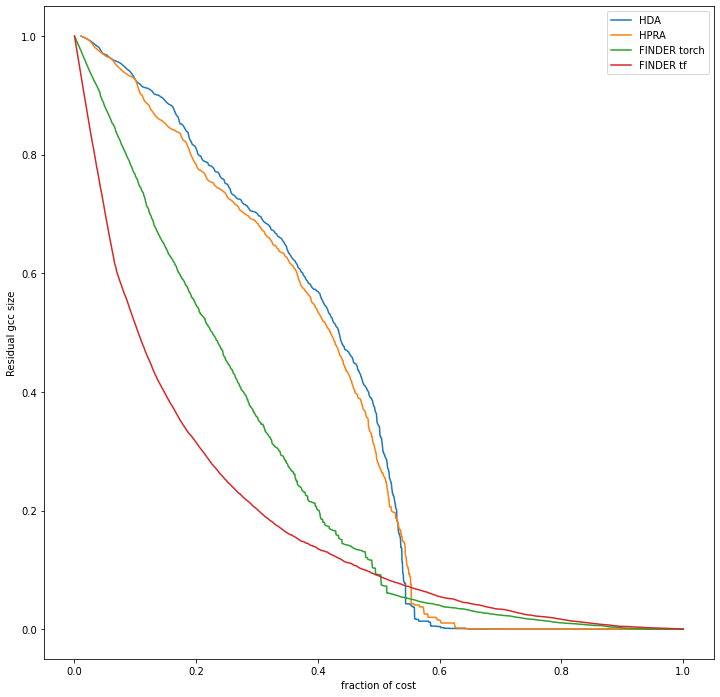

In [ ]:
# plot
# x = fraction (cost) of the removed nodes
# y = size of the giant connected component(GCC) in the residual graph

from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))
plt.plot(HDA_frac_cost_list, HDA_maxcclist, label="HDA")
#plt.plot(HBA_frac_cost_list, HBA_maxcclist, label="HBA")
#plt.plot(HCA_frac_cost_list, HCA_maxcclist, label="HCA")
plt.plot(HPRA_frac_cost_list, HPRA_maxcclist, label="HPRA")

plt.plot(FINDER_frac_cost_list, FINDER_maxcclist, label="FINDER torch")
plt.plot(OFINDER_frac_cost_list, OFINDER_maxcclist, label="FINDER tf")

plt.legend()
plt.xlabel("fraction of cost")
plt.ylabel("Residual gcc size")

## Result discussion

Our model performs similar to the current SOTA FINDER on ND (without cost) senario. On top of that we achieved a slightly faster converge speed.

On the ND (with cost) senarios our model outperforms other heuristic methods (HDA, HPRA, etc.) except FINDER. We will look into the reasons and try couple of improvements list in Ongoing work section.

## Ongoing work

*  Try update DQN to dueling-double DQN, or policy gradient methods
*  Tailor the synthetic training data to the target network, by using methods such as Configuration Model[1]
*  Visualise results with our model and benchmarks on smaller networks (e.g. Venkatesan-09)

**Reference**

[1] Molloy, M. & Reed, B. A critical point for random graphs with a given degree sequence. Random Structures & Algorithms 6, 161–180 (1995).
